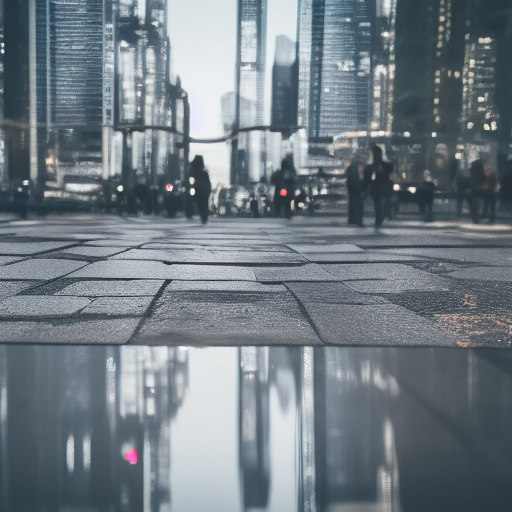

100%|██████████| 20/20 [01:18<00:00,  3.95s/it]


In [8]:
import loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

import warnings
warnings.filterwarnings("ignore", message="A matching Triton is not available")

torch.cuda.empty_cache()


vae_path = None
DEVICE = "cuda"

print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt") #change this to your path
model_file = "../data/v1-5-pruned-emaonly.ckpt" #change this to your path (and change this to the model you would like to use, i used the base 1.5 model here)
models = loader.preload_models_from_standard_weights(model_file, vae_path, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "city, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
negative_prompt = ""
do_cfg = True
cfg_scale = 7  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
# image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 20
seed = 42


output_image = pipeline.generate(
    prompt=prompt,
    negative_prompt=negative_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler=sampler,
    steps=num_inference_steps,
    # seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    fp16_enabled=True,
)



# First time running it may take a while to load the model


### Will optimize the model for faster inference

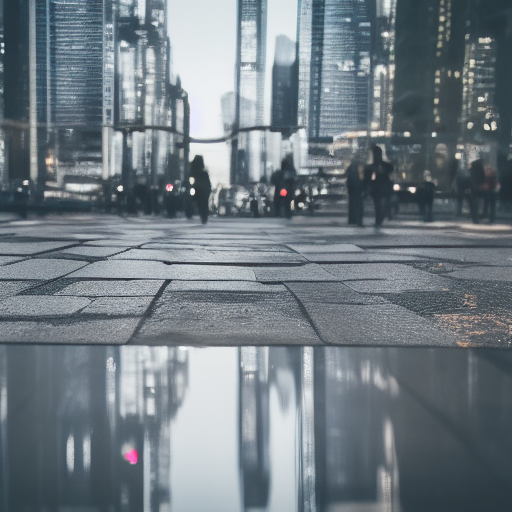

100%|██████████| 20/20 [00:09<00:00,  2.19it/s]


In [2]:
output_image = pipeline.generate(
    prompt=prompt,
    negative_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler=sampler,
    steps=num_inference_steps,
    # seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    fp16_enabled=False,
)

#speed test between fp16 disabled

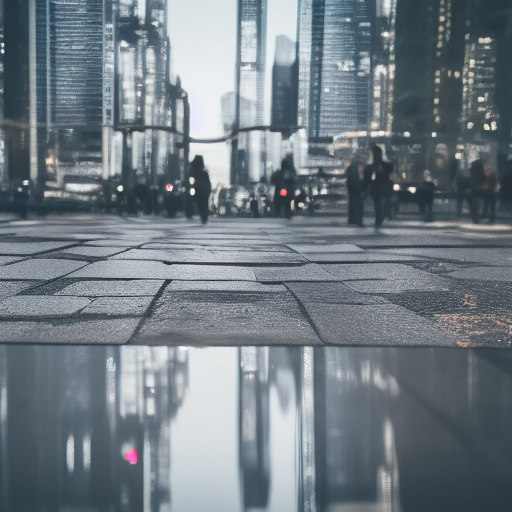

100%|██████████| 20/20 [00:10<00:00,  1.82it/s]


In [4]:
output_image = pipeline.generate(
    prompt=prompt,
    negative_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler=sampler,
    steps=num_inference_steps,
    # seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    fp16_enabled=True,
)

#speed test between fp16 enabled

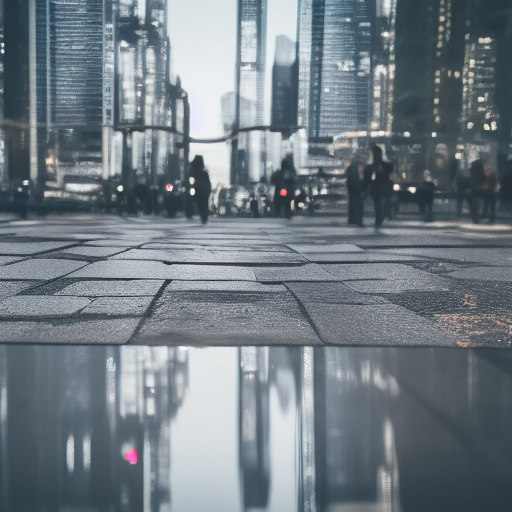

100%|██████████| 20/20 [00:07<00:00,  2.64it/s]


Inference time with FP16: 9.21 seconds
FP32 Inference Time: 10.67 seconds
FP16 Inference Time: 9.21 seconds


In [7]:
import time
import torch
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import loader
import pipeline
import warnings




negative_prompt = ""


# Function to measure inference time and generate output
def run_pipeline(fp16_enabled):
    print(f"\nRunning pipeline with {'FP16' if fp16_enabled else 'FP32'} precision...")
    torch.cuda.empty_cache()  # Clear GPU memory before starting
    start_time = time.time()
    
    output_image = pipeline.generate(
        prompt=prompt,
        negative_prompt=negative_prompt,
        input_image=input_image,
        strength=strength,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler=sampler,
        steps=num_inference_steps,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
        fp16_enabled=fp16_enabled,
    )
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Inference time with {'FP16' if fp16_enabled else 'FP32'}: {elapsed_time:.2f} seconds")
    return output_image, elapsed_time

# Run pipeline with FP32
output_fp32, time_fp32 = run_pipeline(fp16_enabled=False)

# Run pipeline with FP16
output_fp16, time_fp16 = run_pipeline(fp16_enabled=True)


print(f"FP32 Inference Time: {time_fp32:.2f} seconds")
print(f"FP16 Inference Time: {time_fp16:.2f} seconds")